# **이변량분석 - 숫자 vs 범주**

## **1.환경준비**

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자  


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


## **2.숫자 --> 범주**

### **(1) 시각화**

* 히스토그램을 Survived로 나눠서 그려봅시다.

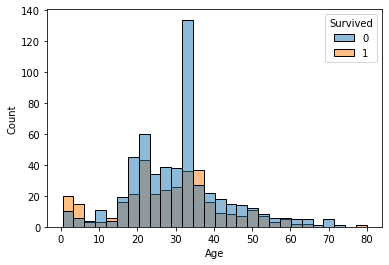

In [3]:
sns.histplot(x='Age', data = titanic, hue = 'Survived')
plt.show()

* kdeplot을 그려봅시다.  
* 두가지 방법이 있습니다.
    * ① kdeplot(   , hue = 'Survived') 
        * 생존여부의 비율이 유지된 채로 그려짐
        * 두 그래프의 아래 면적의 합이 1
    * ② kdeplot(   , hue = 'Survived', common_norm = False)
        * 생존여부 각각 아래 면적의 합이 1인 그래프
    * ③ kdeplot(   , hue = 'Survived', multiple = 'fill')
        * 나이에 따라 생존여부 **비율**을 비교해볼 수 있음. (양의 비교가 아닌 비율!)


① kdeplot( , hue = 'Survived)

* common_norm = True (기본값)

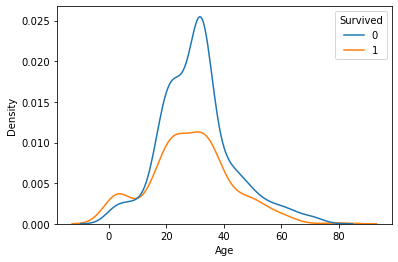

In [4]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived')
plt.show()

② kdeplot( , hue = 'Survived, common_norm = False)

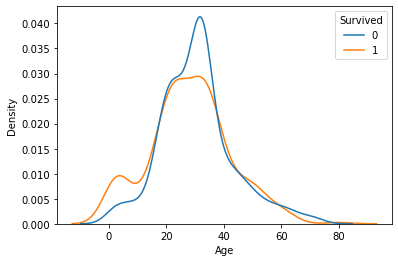

In [5]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived', 
            common_norm = False)
plt.show()

③ multiple = 'fill' 옵션

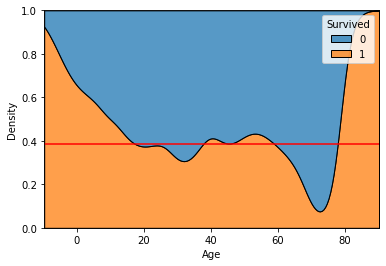

In [6]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived'
            , multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

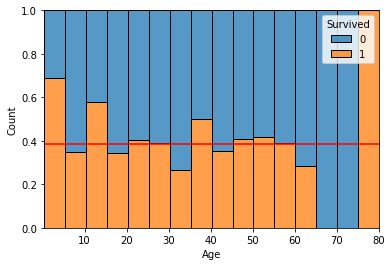

In [7]:
sns.histplot(x='Age', data = titanic, bins = 16
             , hue ='Survived', multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

다음의 관계에 대해 시각화 해 봅시다.

* [문1] Fare(운임) --> Survived

In [8]:
target='Survived'
feature='Fare'

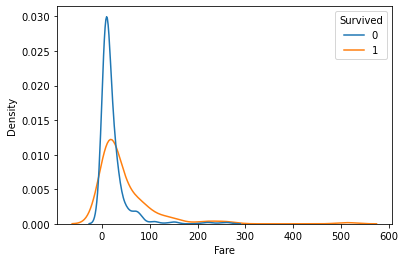

In [9]:
sns.kdeplot(x=feature, data=titanic, hue=target,
           common_norm=False)
plt.show()

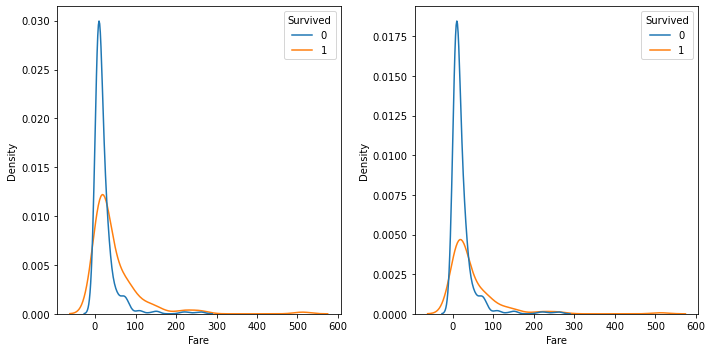

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(x=feature, data=titanic, hue=target,  #각 그래프의 밀도함수는 1
           common_norm=False)

plt.subplot(1,2,2)
sns.kdeplot(x=feature, data=titanic, hue=target,  #각 그래프의 합은 1
           common_norm=True)

plt.tight_layout()
plt.show()

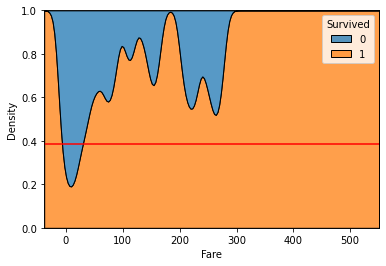

In [13]:
sns.kdeplot(x=feature, data = titanic, hue =target
            , multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

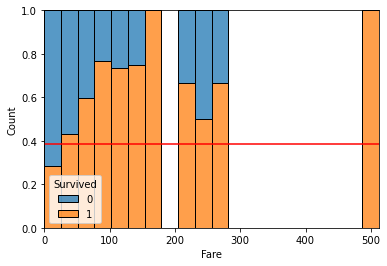

In [18]:
sns.histplot(x=feature, data = titanic, bins = 20
             , hue =target, multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()